### <Sequential API ,  Functional API, SubClassing API>
1) Sequential API : 모델을 스택으로 구성, 학습, 그래프 구조 시각화가 좋으나 분기 네트워크 구축은 불가능하다.   
  
  
2) Functional API : [복잡한 모델을 구축하고 분산] 및 [분기]는 좋으나 그래프 구조 시각화는 불가능하다.  
  

3) SubClassing API : 맞춤형, [동적네트워크 구축]은 좋으나 학습 비용이 높고 그래프 구조 시각화는 어렵다.   


In [1]:
import warnings
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
warnings.filterwarnings('ignore')

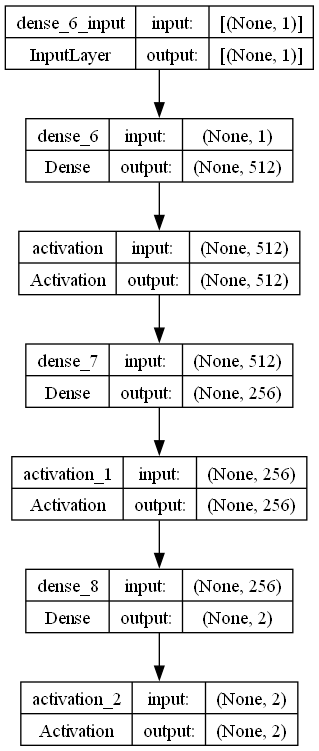

In [2]:
#Q1) Sequential API 사용
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation

#case 01:
model = keras.Sequential()
model.add(Dense(512,input_shape=(1,),activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(2,activation='softmax'))

#case 02: 
model = keras.Sequential([
   Dense(512,input_shape=(1,),activation='relu'),
   Dense(256,activation='relu'),
   Dense(2,activation='softmax')
])

#case  03:
model = keras.Sequential()
model.add(Dense(512,input_shape=(1,)))
model.add(Activation('relu'))

model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('softmax'))
keras.utils.plot_model(model, show_shapes=True)

In [3]:
#Q2)Functional API :레이어를 함수 호출 처럼 연결하면서 모델을 구축한다. 
# 레이어가 [분기 되거나 통합]되는 모델을 만들 수 있다. 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation


'''
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=512, activation='relu', input_shape=(1,)),  
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax') 
])
'''

input   = tf.keras.Input(shape= (1,))
X  = Dense(units=512, activation='relu')(input)
X  = Dense(units=256, activation='relu')(X)
output  = Dense(units=2, activation='softmax')(X)

model = tf.keras.Model( inputs= input , outputs = output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_9 (Dense)             (None, 512)               1024      
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 2)                 514       
                                                                 
Total params: 132866 (519.01 KB)
Trainable params: 132866 (519.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
#Q3)Functional API 활용해 보자. # 레이어가 [분기 되거나 통합]되는 모델을 만들 수 있다. 
import numpy as np

x_train  = np.random.randint(0,5,(20,1))  # shape (20,1)  

y1_train = np.where(x_train % 2 ==  0,  [0,1] ,[1,0])
y2_train = np.where(x_train % 2 ==  0,  [1,0] ,[0,1])

input  = tf.keras.Input(shape =(1,)) 
x  = Dense(512,activation='relu')(input)
x  = Dense(256,activation='relu')(x)


#분기 작업  
output1  = Dense(units=2, activation='softmax',name='output1')(x)
output2  = Dense(units=2, activation='softmax',name='output2')(x)
#통합 작업 모델 생성  
model  = tf.keras.Model( inputs= input , outputs = [output1,output2] )
#모델 속성 설정 
model.compile('adam', loss=['categorical_crossentropy','categorical_crossentropy'], metrics=['accuracy'])
#모델 실행 
history=model.fit(x_train, [y1_train,y2_train] , epochs =200, batch_size= 32, validation_split=0.2, verbose=False)

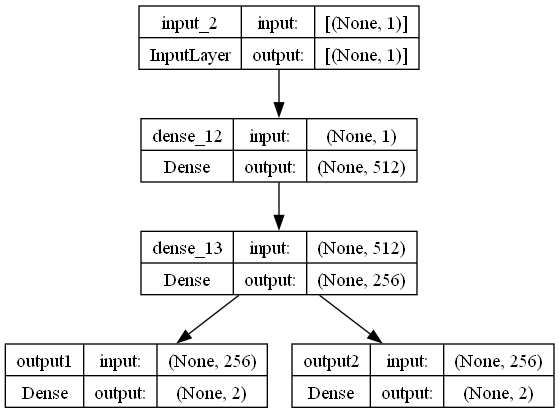

In [5]:
keras.utils.plot_model(model, show_shapes=True)

In [6]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

#Q3-1) 예측값 출력 , 모델 평가_ 테스트 데이터  

##### 테스트 데이터 생성 
x_test=np.random.randint(0,5,(20,1)).astype('float32')  # shape (20,1)  

y1_test = np.where(x_train % 2 ==  0,  [0,1] ,[1,0])
y2_test = np.where(x_train % 2 ==  0,  [1,0] ,[0,1])

#모델 평가  

evaluation = model.evaluate(x_test, [y1_test, y2_test], verbose=0)
print(f'모델 평가 결과 :  {evaluation }') 

#모델 예측
predict= model.predict(x_test)

##Q3-2) 성능 지표 평가  
print( predict[0]) 

# 첫 번째 출력의 성능 지표  np.argmax() -> axis=1에 따라 최대값을 가진 인덱스를 행으로 반환  
y1_pred = np.argmax(predict[0], axis=1)  # 모델의 예측결과중에 가장 높은 가진 인덱스  

##실제 레이블 배열에서 가장 높은 값을 가진 인덱스를 행별로 찾아 리턴  
y1_true = np.argmax(y1_test, axis=1)  #각 샘플의 실제 클래스  

print('첫 번째 출력 성능 지표:')
print(classification_report(y1_true, y1_pred))


# 두 번째 출력의 성능 지표
y2_pred = np.argmax(predict[1], axis=1)
y2_true = np.argmax(y2_test, axis=1)
print('두 번째 출력 성능 지표:')
print(classification_report(y2_true, y2_pred))

모델 평가 결과 :  [2.8239970207214355, 1.4005558490753174, 1.4234411716461182, 0.550000011920929, 0.550000011920929]
1/1 [==============================] - 0s 117ms/step
[[2.0768440e-01 7.9231560e-01]
 [5.0775154e-04 9.9949229e-01]
 [2.0768440e-01 7.9231560e-01]
 [6.4270228e-01 3.5729775e-01]
 [6.4386362e-01 3.5613635e-01]
 [8.5560840e-01 1.4439161e-01]
 [6.4270228e-01 3.5729775e-01]
 [6.4386362e-01 3.5613635e-01]
 [5.0775154e-04 9.9949229e-01]
 [6.4270228e-01 3.5729775e-01]
 [6.4270228e-01 3.5729775e-01]
 [5.0775154e-04 9.9949229e-01]
 [6.4386362e-01 3.5613635e-01]
 [2.0768440e-01 7.9231560e-01]
 [8.5560840e-01 1.4439161e-01]
 [6.4270228e-01 3.5729775e-01]
 [6.4386362e-01 3.5613635e-01]
 [6.4386362e-01 3.5613635e-01]
 [5.0775131e-04 9.9949229e-01]
 [8.5560840e-01 1.4439161e-01]]
첫 번째 출력 성능 지표:
              precision    recall  f1-score   support

           0       0.54      0.70      0.61        10
           1       0.57      0.40      0.47        10

    accuracy                        

In [7]:
##Q3-3) 모델을 저장해 보자. 
model.save('res/Functional.h5')
print('모델이 저장되었다.')

모델이 저장되었다.


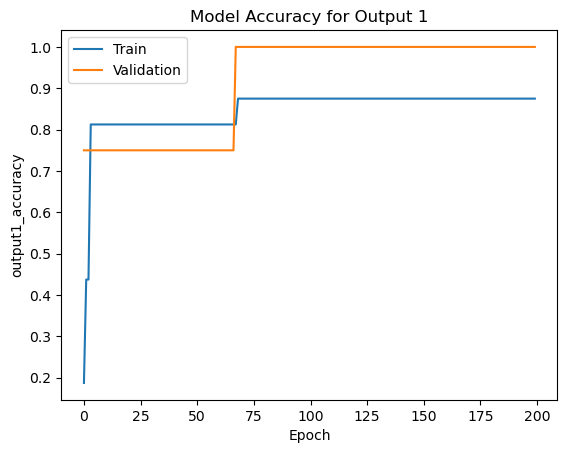

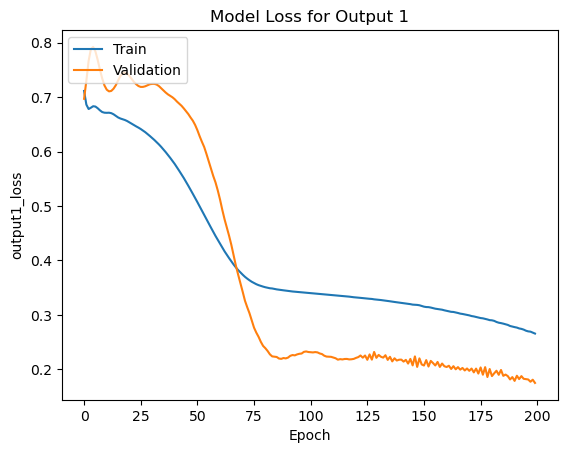

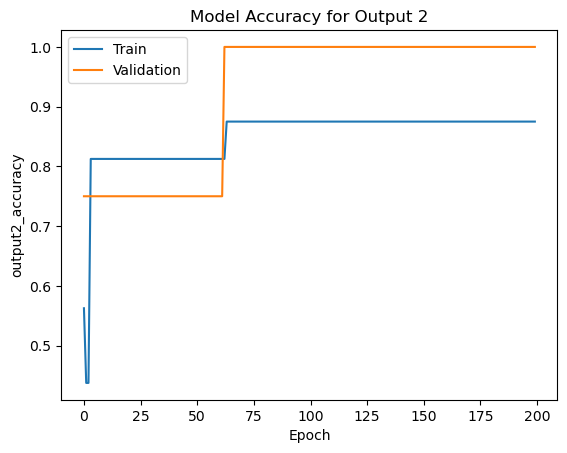

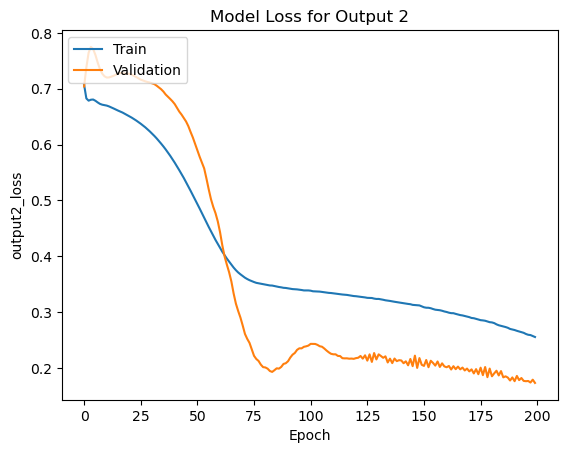

In [8]:
##Q3-4)시각화 
def plot_history(history, metric_name, title):
    plt.plot(history.history[metric_name])
    plt.plot(history.history['val_' + metric_name])
    plt.title(title)
    plt.ylabel(metric_name)
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_history(history, 'output1_accuracy', 'Model Accuracy for Output 1')
plot_history(history, 'output1_loss', 'Model Loss for Output 1')
plot_history(history, 'output2_accuracy', 'Model Accuracy for Output 2')
plot_history(history, 'output2_loss', 'Model Loss for Output 2')

In [9]:
from tensorflow.keras.models import load_model
model = load_model('res/Functional.h5')
predictions = model.predict([4])
predictions

1/1 [==============================] - 0s 104ms/step


[array([[0.20768434, 0.79231566]], dtype=float32),
 array([[0.7937965 , 0.20620348]], dtype=float32)]

In [10]:
y2_pred_class = np.argmax(predictions)

In [11]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 dense_12 (Dense)            (None, 512)                  1024      ['input_2[0][0]']             
                                                                                                  
 dense_13 (Dense)            (None, 256)                  131328    ['dense_12[0][0]']            
                                                                                                  
 output1 (Dense)             (None, 2)                    514       ['dense_13[0][0]']            
                                                                                            

In [ ]:
#exam) 분기형 모델을 아이리스 데이터로 만들어 보자